In [1]:
import nn
import matplotlib.pyplot as plt
import numpy as np

# Resolviendo XOR

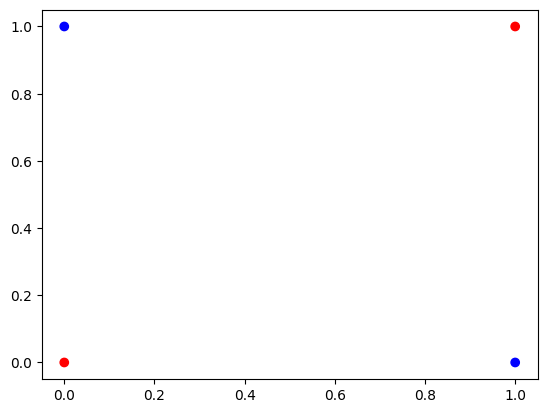

In [2]:
# Truth table of XOR
X = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
])

y = np.array([0.0, 1.0, 1.0, 0.0])

plt.scatter(X[:,0], X[:,1], color=['red' if i == 0 else 'blue' for i in y])

### Entrenamiento de la red

In [20]:
learning_rate = 0.05
epochs = 200

mlp = nn.MLP(len(X[0]), [4, 4, 1], activation='relu', out_activation='sigm')

print(f'Resumen del modelo: {mlp.layers}')

history_loss = nn.train_GD(nn.binary_cross_entropy_loss, mlp, X, y, epochs, learning_rate)

Resumen del modelo: [Layer(nin=2,nout=4,activation=relu), Layer(nin=4,nout=4,activation=relu), Layer(nin=4,nout=1,activation=sigm)]
Epoch 1/200 | Loss: 1.20362
Epoch 2/200 | Loss: 1.16932
Epoch 3/200 | Loss: 1.14275
Epoch 4/200 | Loss: 1.12189
Epoch 5/200 | Loss: 1.10524
Epoch 6/200 | Loss: 1.09170
Epoch 7/200 | Loss: 1.08046
Epoch 8/200 | Loss: 1.07092
Epoch 9/200 | Loss: 1.06266
Epoch 10/200 | Loss: 1.05537
Epoch 11/200 | Loss: 1.04880
Epoch 12/200 | Loss: 1.04279
Epoch 13/200 | Loss: 1.03722
Epoch 14/200 | Loss: 1.03198
Epoch 15/200 | Loss: 1.02701
Epoch 16/200 | Loss: 1.02261
Epoch 17/200 | Loss: 1.01851
Epoch 18/200 | Loss: 1.01454
Epoch 19/200 | Loss: 1.01068
Epoch 20/200 | Loss: 1.00690
Epoch 21/200 | Loss: 1.00320
Epoch 22/200 | Loss: 0.99955
Epoch 23/200 | Loss: 0.99595
Epoch 24/200 | Loss: 0.99239
Epoch 25/200 | Loss: 0.98885
Epoch 26/200 | Loss: 0.98534
Epoch 27/200 | Loss: 0.98184
Epoch 28/200 | Loss: 0.97835
Epoch 29/200 | Loss: 0.97486
Epoch 30/200 | Loss: 0.97137
Epoch 3

Text(0, 0.5, 'Loss')

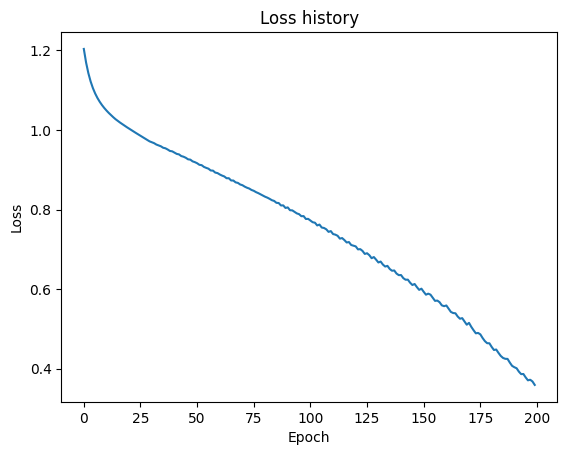

In [21]:
plt.plot(range(len(history_loss)), history_loss)
# Set the title and labels
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Predicciones

In [22]:
print("Predictions:", [mlp(x).data for x in X])
print("Labels:", y)

Predictions: [0.1796180642535704, 0.8693394246422472, 0.7189119647609262, 0.2641904880450597]
Labels: [0. 1. 1. 0.]


## Decision boundary del problema

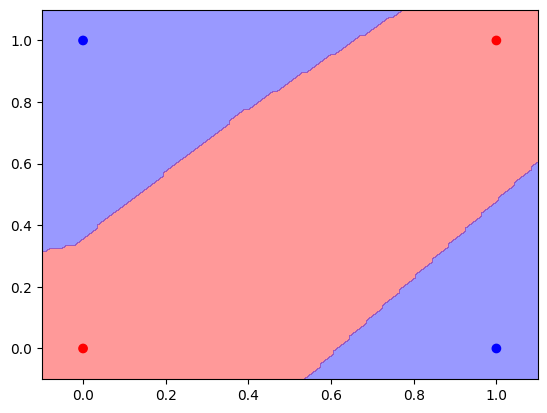

In [23]:
x1_range = np.arange(-0.1, 1.1, 0.01)
x2_range = np.arange(-0.1, 1.1, 0.01)
xx1, xx2 = np.meshgrid(x1_range, x2_range, indexing='ij')

Z = np.array([mlp([x1_l[i], x2_l[i]]).data >= 0.5 for x1_l, x2_l in zip(xx1, xx2) for i in range(len(x1_l))]).reshape((len(x2_range), -1))

plt.contourf(xx1, xx2, Z, colors=['red', 'blue'], alpha=0.4)
plt.scatter(X[:,0], X[:,1], color=['red' if i == 0 else 'blue' for i in y])